# Выбросы (Outliers)

# References


[How To Prepare Your Data for Your Machine Learning Model](https://towardsdatascience.com/how-to-prepare-your-data-for-your-machine-learning-model-b4c9fd4e7ea)

[How to Exclude the Outliers in Pandas DataFrame](https://towardsdatascience.com/how-to-exclude-the-outliers-in-pandas-dataframe-c749fca4e091)

[Выброс (статистика)](https://ru.wikipedia.org/wiki/%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81_(%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0))

[Chauvenet's criterion](https://en.wikipedia.org/wiki/Chauvenet%27s_criterion)

[Статистические критерии определения выбросов в непрерывных статистических данных](https://math.bobrodobro.ru/7807)

[Identifying Outliers: IQR Method](https://online.stat.psu.edu/stat200/lesson/3/3.2#:~:text=We%20can%20use%20the%20IQR,this%20fence%20are%20considered%20outliers.&text=Any%20observations%20that%20are%20more,above%20Q3%20are%20considered%20outliers.)

[Z-score for anomaly detection](https://towardsdatascience.com/z-score-for-anomaly-detection-d98b0006f510)

# References

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install pandas matplotlib numpy seaborn scipy -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

In [7]:
import scipy
from scipy import stats

scipy.__version__

'1.6.2'

## Загрузка данных

[Источник (Adult income dataset)](https://www.kaggle.com/wenruliu/adult-income-dataset).

[Описание](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html)

[Дополнительное описание + анализ](http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf)

In [8]:
df = pd.read_csv("./../../data/adult.csv")

# показать все колонки
pd.options.display.max_columns = None

# изменить формат отображения с помощью средства форматирования
# (float без E, а 2 знаков после запятой)
# (для удобства чтения)
pd.options.display.float_format = "{:.2f}".format

# отобразить первые 5 и последние 5 строк
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
# получить сведения о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
# References  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Выброс (Outlier)

**Выброс (англ. outlier), промах** — в статистике результат измерения, выделяющийся из общей выборки.

Статистический метод, способный действовать в условиях выбросов, называется **робастным**. 

**Медиана** является **робастной** характеристикой, а выборочное **среднее** — **нет**.

Существует пример ([квартет Энскомба](https://ru.wikipedia.org/wiki/%D0%9A%D0%B2%D0%B0%D1%80%D1%82%D0%B5%D1%82_%D0%AD%D0%BD%D1%81%D0%BA%D0%BE%D0%BC%D0%B1%D0%B0)), демонстрирующий, насколько не робастные методы обработки статистических данных способны "врать", даже если выброс всего один на 10 "обычных" результатов.

## Графическое представление выбросов

In [10]:
df_numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols_len = len(df_numeric_cols)

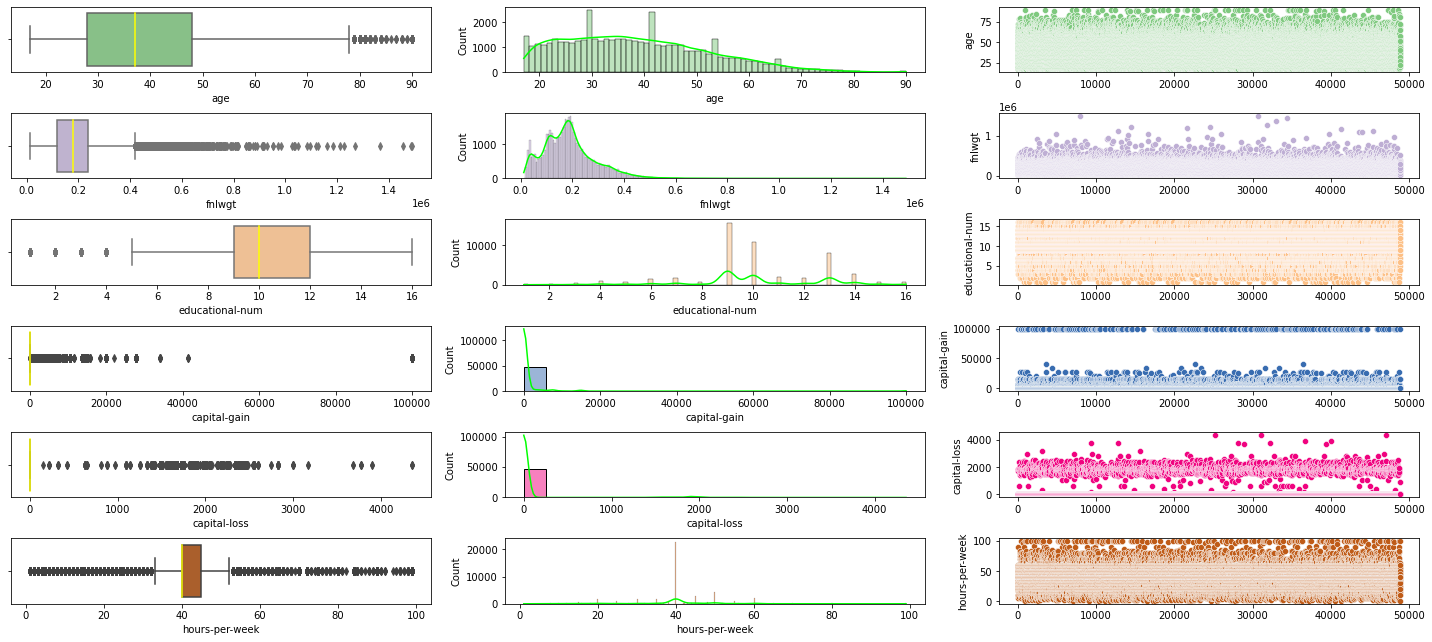

In [11]:
fig, axs = plt.subplots(numeric_cols_len, 3, figsize=(20, 9))

cmap = plt.get_cmap("Accent")

for index, column_name in enumerate(df_numeric_cols):
    c = cmap(index / numeric_cols_len)

    sns.boxplot(x=df[column_name], ax=axs[index][0], color=c)
    axs[index][0].get_lines()[4].set_color("yellow")

    sns.histplot(x=df[column_name], kde=True, ax=axs[index][1], color=c)
    axs[index][1].get_lines()[0].set_color("lime")

    sns.scatterplot(data=df[column_name], ax=axs[index][2], color=c)


fig.tight_layout(pad=1.0)

## Обнаружение выбросов по критериям

Поскольку множество статистических методов "буксуют" на выборках с выбросами, выбросы приходится обнаруживать (желательно — автоматически) и исключать из выборки.

Простейшие (и самые часто используемые) способы основаны на:
- **межквартильном расстоянии (Interquartile range = IQR)**
- **z-оценке (z-score)**


Существуют более специфические стандартные критерии определения выбросов в выборке при заданном уровне значимости/доверия.

Примерами таких критериев служат: 
- *критерий Шовене
- *тест Граббса
- *критерий Пирса
- *Q-тест Диксона.

Упомянутые критерии (за исключением критерия Граббса) выстраивают выборку по возрастанию и проверяют крайние значения (min, max элемент выборки) на выброс, подключается таблица критических значений.

Значения в таблицах зависят от количества элементов в выборке и уровня доверия/значимости. Критерии позволяют определить точно один выброс, в случае, когда их много, критерии могут не работать.

In [12]:
edu_num_with = df["educational-num"]

### Способ основанный на межквартильном расстоянии (Interquartile range = IQR, Tukey's fences)

(Проще всего)

**Именно такой способ использует `boxplot`.**

$Q_{1}$ и $Q_{3}$ являются нижним и верхним квартилями соответственно.

Можно определить выброс как любое наблюдение за пределами диапазона:

<img src="./images/fences_formula.svg" />

Для некоторой неотрицательной константы $\large k$.

Джон Тьюки (John Tukey) предложил этот тест, где $\large k = 1.5$ указывает на "выброс (outlier)", а $\large k = 3$ указывает на данные, которые "далеко за пределами (far out)".

<img src="./images/fences.png" height=300 width=300 />

In [13]:
edu_num_with.describe()

count   48842.00
mean       10.08
std         2.57
min         1.00
25%         9.00
50%        10.00
75%        12.00
max        16.00
Name: educational-num, dtype: float64

In [14]:
Q1 = edu_num_with.quantile(0.25)
Q3 = edu_num_with.quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 = {Q1}\nQ3 = {Q3}\nIQR = {IQR}")

Q1 = 9.0
Q3 = 12.0
IQR = 3.0


In [15]:
lower_fence = Q1 - 1.5 * IQR
lower_fence

4.5

In [16]:
upper_fence = Q3 + 1.5 * IQR
upper_fence

16.5

In [17]:
edu_num_without_iqr = edu_num_with[
    ~((edu_num_with < lower_fence) | (edu_num_with > upper_fence))
]
edu_num_without_iqr

0         7
1         9
2        12
3        10
4        10
         ..
48837    12
48838     9
48839     9
48840     9
48841     9
Name: educational-num, Length: 47048, dtype: int64

In [18]:
len(edu_num_with) - len(edu_num_without_iqr)

1794

<AxesSubplot:>

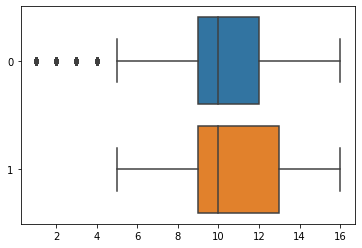

In [19]:
sns.boxplot(data=[edu_num_with, edu_num_without_iqr], orient="h")

### Способ основанный на Z-оценке (z-score)

**Стандартизованная оценка (z-оценка, Standard score, z-score)** - это мера относительного разброса наблюдаемого или измеренного значения, которая показывает, сколько стандартных отклонений составляет его разброс относительного среднего значения.

Это безразмерный статистический показатель, используемый для сравнения значений разной размерности или шкалой измерений.

<img src="./images/z-score_formula.jpg" height=500 width=500 />

<img src="./images/z-score.svg" />

Обычно считается, что значения лежащие за пределами **`z = 3`** являются выбросами. Это связано с **правилом трех сигм (3-sigma rule)**.

Для **нормального распределения** значения, отличающиеся от среднего на число, меньшее чем *одно стандартное отклонение* ($\sigma$), составляют **68,27%** выборки.
В то же время значения, отличающиеся от среднего на *два стандартных отклонения* ($2\sigma$), составляют **95,45%**, а на *три стандартных отклонения* ($3\sigma$) — **99,73%**.

**Правило трёх сигм ($3\sigma$)** — практически все значения **нормально распределённой** случайной величины лежат в интервале $(\mu -3\sigma;\mu + 3\sigma)$, где $\mu$ — математическое ожидание и параметр нормальной случайной величины, а $\sigma$ — среднеквадратическое отклонение.

In [20]:
z = stats.zscore(edu_num_with)
z

array([-1.19725891, -0.41933527,  0.74755018, ..., -0.41933527,
       -0.41933527, -0.41933527])

In [21]:
z_abs = np.abs(z)

In [22]:
# обычно указывается z равный 3 из-за
# правила трех сигм
z_threshold = 3

In [23]:
edu_num_without_z = edu_num_with[z_abs < z_threshold]
edu_num_without_z

0         7
1         9
2        12
3        10
4        10
         ..
48837    12
48838     9
48839     9
48840     9
48841     9
Name: educational-num, Length: 48512, dtype: int64

In [24]:
len(edu_num_with) - len(edu_num_without_z)

330

<AxesSubplot:>

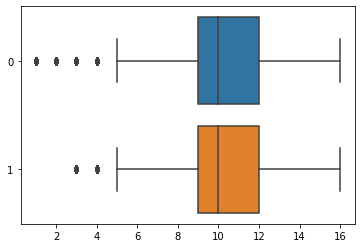

In [25]:
sns.boxplot(data=[edu_num_with, edu_num_without_z], orient="h")

## Дополнительная информация

<img src="https://raw.githubusercontent.com/ryndovaira-org/data_science_notes/main/images/sensitivity_to_outliers_ml_algorithms.png">